Feature Engineering playlist: https://www.youtube.com/watch?v=NgoLM...

Feature Engineering-How to Perform One Hot Encoding for Multi Categorical Variables : https://www.youtube.com/watch?v=6WDFfaYtN6s&list=PLZoTAELRMXVPwYGE2PXD3x0bfKnR0cJjN

In [1]:
import pandas as pd
import numpy as np

data = pd.read_csv(r"D:\Data Science\Feature Engineering\Feature Engineering-How to Perform One Hot Encoding for Multi Categorical Variables\mercedesbenz.csv", usecols=['X1','X2','X3','X4','X5','X6'])
data.head()

,X1,X2,X3,X4,X5,X6
0,v,at,a,d,u,j
1,t,av,e,d,y,l
2,w,n,c,d,x,j
3,t,n,f,d,x,l
4,v,n,f,d,h,d


In [2]:
# let's have a look how many labels each variable has 

for col in data.columns:
    print(col, ' : ',len(data[col].unique()), ' Labels')

X1  :  27  Labels
X2  :  44  Labels
X3  :  7  Labels
X4  :  4  Labels
X5  :  29  Labels
X6  :  12  Labels


In [3]:
# let's examine how many columns will obtain after one hot encoding these variables

pd.get_dummies(data, drop_first=True).shape

(4209, 117)

if we have 500 unique values that time wa have to create 499 columns so it will take more time to train model, so that we will take top 10 most categories for the variable

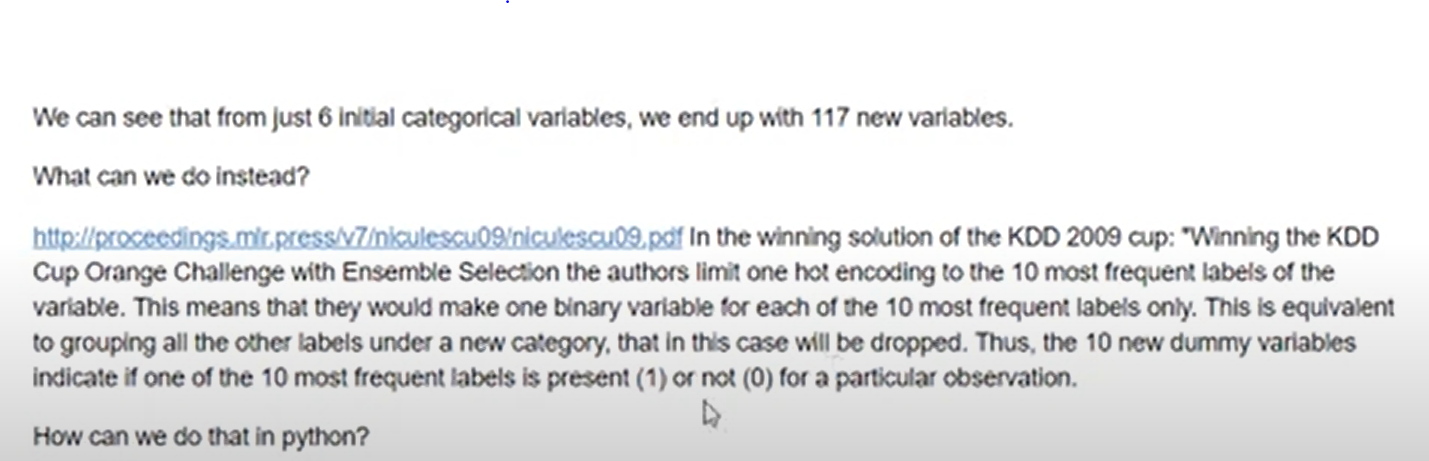

In [4]:
# Let's find the top 10 most categories for the variable X2

data.X2.value_counts().sort_values(ascending=False).head(20)

as    1659
ae     496
ai     415
m      367
ak     265
r      153
n      137
s       94
f       87
e       81
aq      63
ay      54
a       47
t       29
k       25
i       25
b       21
ao      20
ag      19
z       19
Name: X2, dtype: int64

In [5]:
# Let's make a list with the most frequent categories for the variable

top_10 = [x for x in data.X2.value_counts().sort_values(ascending=False).head(10).index]
top_10

['as', 'ae', 'ai', 'm', 'ak', 'r', 'n', 's', 'f', 'e']

In [6]:
# and now we make the 10 binary variables

for label in top_10:
    data[label] = np.where(data['X2']==label, 1,0)

data[['X2']+top_10].head(40)

,X2,as,ae,ai,m,ak,r,n,s,f,e
0,at,0,0,0,0,0,0,0,0,0,0
1,av,0,0,0,0,0,0,0,0,0,0
2,n,0,0,0,0,0,0,1,0,0,0
3,n,0,0,0,0,0,0,1,0,0,0
4,n,0,0,0,0,0,0,1,0,0,0
5,e,0,0,0,0,0,0,0,0,0,1
6,e,0,0,0,0,0,0,0,0,0,1
7,as,1,0,0,0,0,0,0,0,0,0
8,as,1,0,0,0,0,0,0,0,0,0
9,aq,0,0,0,0,0,0,0,0,0,0


In [7]:
# get whole set of dummy variables, for all the categorical variables

def one_hot_top(df, variable, top_x_labels):
    # function to create the dummy variables for the most frequent labels
    # we can vary the number of most frequent labels that we encode
    
    for label in  top_x_labels:
        df[variable+'_'+label] = np.where(data[variable]==label, 1,0)

# read the data again
data = pd.read_csv(r"D:\Data Science\Feature Engineering\Feature Engineering-How to Perform One Hot Encoding for Multi Categorical Variables\mercedesbenz.csv", usecols=['X1','X2','X3','X4','X5','X6'])

# encode X2 into the 10 most frequent categories

one_hot_top(data, 'X2', top_10)
data.head()

,X1,X2,X3,X4,X5,X6,X2_as,X2_ae,X2_ai,X2_m,X2_ak,X2_r,X2_n,X2_s,X2_f,X2_e
0,v,at,a,d,u,j,0,0,0,0,0,0,0,0,0,0
1,t,av,e,d,y,l,0,0,0,0,0,0,0,0,0,0
2,w,n,c,d,x,j,0,0,0,0,0,0,1,0,0,0
3,t,n,f,d,x,l,0,0,0,0,0,0,1,0,0,0
4,v,n,f,d,h,d,0,0,0,0,0,0,1,0,0,0


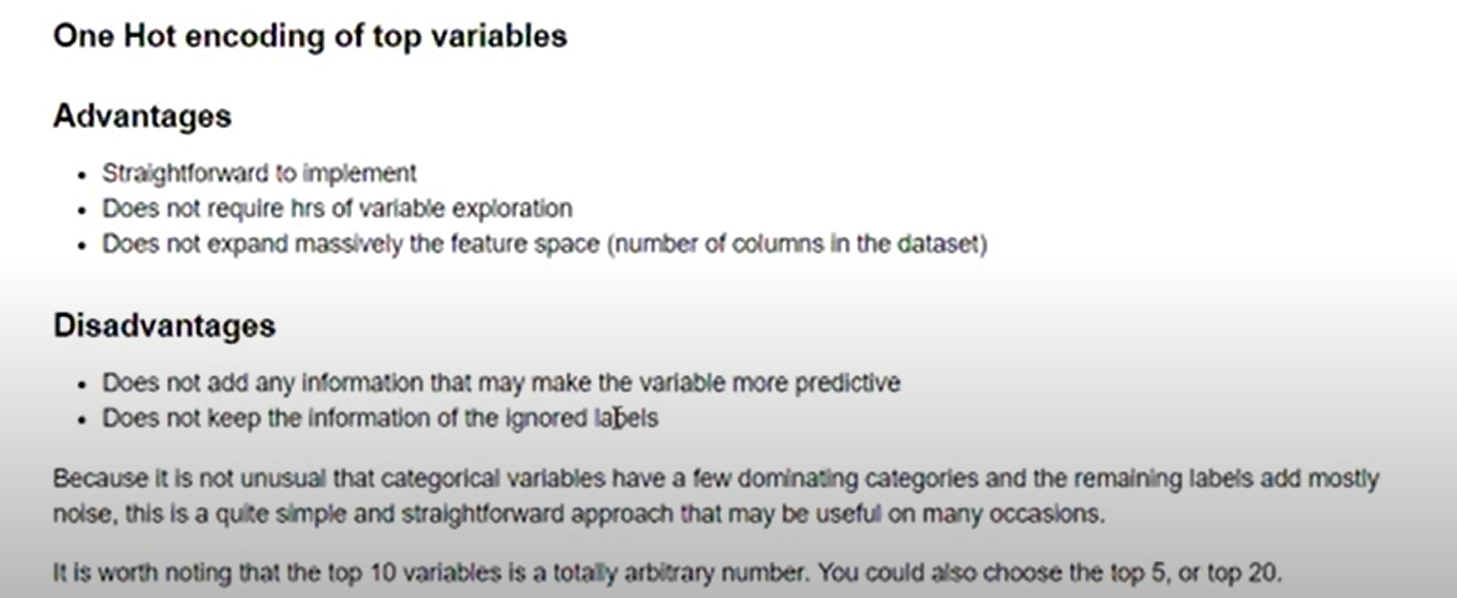

In [11]:
# X1 column
top_10 = [x for x in data.X1.value_counts().sort_values(ascending=False).head(10).index]

data=one_hot_top(data, 'X1', top_10)
data.head()

,X1,X2,X3,X4,X5,X6,X2_as,X2_ae,X2_ai,X2_m,...,X1_f,X1_e,X1_aa,X1_b,X1_l,X1_v,X1_i,X1_a,X1_c,X1_o
0,v,at,a,d,u,j,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,t,av,e,d,y,l,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,w,n,c,d,x,j,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,t,n,f,d,x,l,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,v,n,f,d,h,d,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [12]:
# X3 column
top_10 = [x for x in data.X2.value_counts().sort_values(ascending=False).head(10).index]

one_hot_top(data, 'X3', top_10)
data.head()

,X1,X2,X3,X4,X5,X6,X2_as,X2_ae,X2_ai,X2_m,...,X3_as,X3_ae,X3_ai,X3_m,X3_ak,X3_r,X3_n,X3_s,X3_f,X3_e
0,v,at,a,d,u,j,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,t,av,e,d,y,l,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,w,n,c,d,x,j,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,t,n,f,d,x,l,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,v,n,f,d,h,d,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [13]:
# X4 column
top_10 = [x for x in data.X4.value_counts().sort_values(ascending=False).head(10).index]

one_hot_top(data, 'X4', top_10)
data.head()

,X1,X2,X3,X4,X5,X6,X2_as,X2_ae,X2_ai,X2_m,...,X3_ak,X3_r,X3_n,X3_s,X3_f,X3_e,X4_d,X4_a,X4_b,X4_c
0,v,at,a,d,u,j,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,t,av,e,d,y,l,0,0,0,0,...,0,0,0,0,0,1,1,0,0,0
2,w,n,c,d,x,j,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,t,n,f,d,x,l,0,0,0,0,...,0,0,0,0,1,0,1,0,0,0
4,v,n,f,d,h,d,0,0,0,0,...,0,0,0,0,1,0,1,0,0,0


In [14]:
# X5 column
top_10 = [x for x in data.X5.value_counts().sort_values(ascending=False).head(10).index]

one_hot_top(data, 'X5', top_10)
data.head()

,X1,X2,X3,X4,X5,X6,X2_as,X2_ae,X2_ai,X2_m,...,X5_w,X5_v,X5_q,X5_r,X5_s,X5_d,X5_n,X5_p,X5_m,X5_i
0,v,at,a,d,u,j,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,t,av,e,d,y,l,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,w,n,c,d,x,j,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,t,n,f,d,x,l,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,v,n,f,d,h,d,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [15]:
# X6 column
top_10 = [x for x in data.X6.value_counts().sort_values(ascending=False).head(10).index]

one_hot_top(data, 'X6', top_10)
data.head()

,X1,X2,X3,X4,X5,X6,X2_as,X2_ae,X2_ai,X2_m,...,X6_g,X6_j,X6_d,X6_i,X6_l,X6_a,X6_h,X6_k,X6_c,X6_b
0,v,at,a,d,u,j,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1,t,av,e,d,y,l,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,w,n,c,d,x,j,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
3,t,n,f,d,x,l,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,v,n,f,d,h,d,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


,X1,X2,X3,X4,X5,X6,X2_as,X2_ae,X2_ai,X2_m,...,X6_g,X6_j,X6_d,X6_i,X6_l,X6_a,X6_h,X6_k,X6_c,X6_b
0,v,at,a,d,u,j,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1,t,av,e,d,y,l,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,w,n,c,d,x,j,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
3,t,n,f,d,x,l,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,v,n,f,d,h,d,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4204,s,as,c,d,aa,d,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4205,o,t,d,d,aa,h,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4206,v,r,a,d,aa,g,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4207,r,e,f,d,aa,l,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [21]:
#saving data in my local drive
data.to_csv('file1.csv')